In [1]:
!pip install matplotlib pillow
# 폴리곤 데이터와 이미지 데이터가 일치하는지 확인하는 데이터

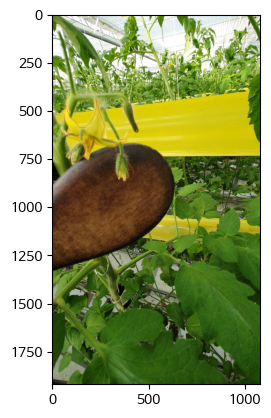

In [2]:
import json
from PIL import Image, ImageDraw, ExifTags
import matplotlib.pyplot as plt
import os

# JSON 파일 불러오기
with open('E:/tomato_label/097.지능형_스마트팜_통합_데이터(토마토)/01.데이터/1.Training/라벨링데이터/d1.꽃(개화군)/V001_tom1_00_065_d1_17_20220101_27_06095632_40158887.json', 'r') as f:
    data = json.load(f)

# 이미지 파일 경로 설정
image_dir = 'E:/tomato_label/097.지능형_스마트팜_통합_데이터(토마토)/01.데이터/1.Training/원천데이터/d1.꽃(개화군)'  
image_path = os.path.join(image_dir, data['imagePath'])

# 이미지 불러오기
image = Image.open(image_path)

# Exif 데이터에서 회전 정보 가져오기
try:
    for orientation in ExifTags.TAGS.keys():
        if ExifTags.TAGS[orientation]=='Orientation':
            break
    exif=dict(image._getexif().items())

    if exif[orientation] == 3:
        image=image.rotate(180, expand=True)
    elif exif[orientation] == 6:
        image=image.rotate(270, expand=True)
    elif exif[orientation] == 8:
        image=image.rotate(90, expand=True)

except (AttributeError, KeyError, IndexError):
    # 이미지에 Exif 데이터가 없는 경우
    pass

draw = ImageDraw.Draw(image)

# JSON 파일에서 폴리곤 정보 가져와서 그리기
for shape in data['shapes']:
    points = [(int(x), int(y)) for x, y in shape['points']]  # 좌표값들을 정수로 변환
    if shape['shape_type'] == 'polygon':
        draw.polygon(points, outline ='red')
    elif shape['shape_type'] == 'rectangle':
        x0, y0, x1, y1 = min(points[0][0], points[1][0]), min(points[0][1], points[1][1]), max(points[0][0], points[1][0]), max(points[0][1], points[1][1])
        draw.rectangle([x0, y0, x1, y1], outline ='blue')

# 이미지 보여주기
plt.imshow(image)
plt.show()

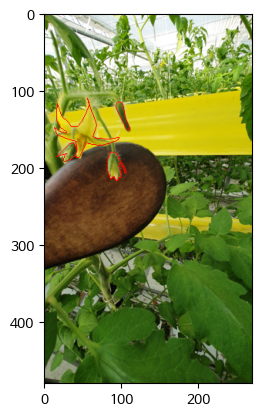

In [17]:
import json
from PIL import Image, ImageDraw, ExifTags
import matplotlib.pyplot as plt
import os

# JSON 파일 불러오기
with open('E:/tomato_label/097.지능형_스마트팜_통합_데이터(토마토)/01.데이터/1.Training/라벨링데이터/d1.꽃(개화군)/V001_tom1_00_065_d1_17_20220101_27_06095632_40158887.json', 'r') as f:
    data = json.load(f)

# 이미지 파일 경로 설정
image_dir = 'E:/tomato_label/097.지능형_스마트팜_통합_데이터(토마토)/01.데이터/1.Training/원천데이터/d1.꽃(개화군)' 
image_path = os.path.join(image_dir, data['imagePath'])

# 이미지 불러오기
image = Image.open(image_path)

# Exif 데이터에서 회전 정보 가져오기
try:
    for orientation in ExifTags.TAGS.keys():
        if ExifTags.TAGS[orientation]=='Orientation':
            break
    exif=dict(image._getexif().items())

    if exif[orientation] == 3:
        image=image.rotate(180, expand=True)
    elif exif[orientation] == 6:
        image=image.rotate(270, expand=True)
    elif exif[orientation] == 8:
        image=image.rotate(90, expand=True)

except (AttributeError, KeyError, IndexError):
    # 이미지에 Exif 데이터가 없는 경우
    pass

# 원본 이미지의 크기를 저장
original_width, original_height = image.size

# 이미지 크기 조정
new_size = (270, 480)  # 새로운 이미지 크기
image = image.resize(new_size)

# JSON 데이터의 좌표값 조정
width_ratio = new_size[0] / original_width
height_ratio = new_size[1] / original_height
for shape in data['shapes']:
    shape['points'] = [[x * width_ratio, y * height_ratio] for x, y in shape['points']]

# Draw 객체 생성
draw = ImageDraw.Draw(image)  # 새로운 이미지 객체에 대해 draw 객체 생성이 아니라, 이미 크기 조정된 image 객체에 대해 생성해야 합니다.

# JSON 파일에서 폴리곤 정보 가져와서 그리기
for shape in data['shapes']:
    points = [(int(x), int(y)) for x, y in shape['points']]  # 좌표값들을 정수로 변환
    if shape['shape_type'] == 'polygon':
        draw.polygon(points, outline ='red')
    elif shape['shape_type'] == 'rectangle':
        x0, y0, x1, y1 = min(points[0][0], points[1][0]), min(points[0][1], points[1][1]), max(points[0][0], points[1][0]), max(points[0][1], points[1][1])
        draw.rectangle([x0, y0, x1, y1], outline ='blue')

# 이미지 보여주기
plt.imshow(image)
plt.show()
